# COSC 437 Lab Assignment 2 - Linear Regression
In this lab assignment, you are going to work on a simple yet challenging project, to predict the housing price based on certain factors like house area, bedrooms, furnished, nearness to mainroad, etc. The dataset is small yet, it's complexity arises due to the fact that it has strong multicollinearity. Can you overcome these obstacles & build a decent predictive model?

Required packages:
- numpy
- pandas (optional)
- sklearn
- matplotlib

## Part 1: Preprocessing and Exploratory Data Analysis
Explore the data set, understand the dimension of it and how data is represented. 

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# load the data
df = pd.read_csv("Housing.csv")
df.info()
df.dtypes
df.values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


array([[13300000, 7420, 4, ..., 2, 'yes', 'furnished'],
       [12250000, 8960, 4, ..., 3, 'no', 'furnished'],
       [12250000, 9960, 3, ..., 2, 'yes', 'semi-furnished'],
       ...,
       [1750000, 3620, 2, ..., 0, 'no', 'unfurnished'],
       [1750000, 2910, 3, ..., 0, 'no', 'furnished'],
       [1750000, 3850, 3, ..., 0, 'no', 'unfurnished']],
      shape=(545, 13), dtype=object)

For numerical attributes, use histograms to see their distributions. 

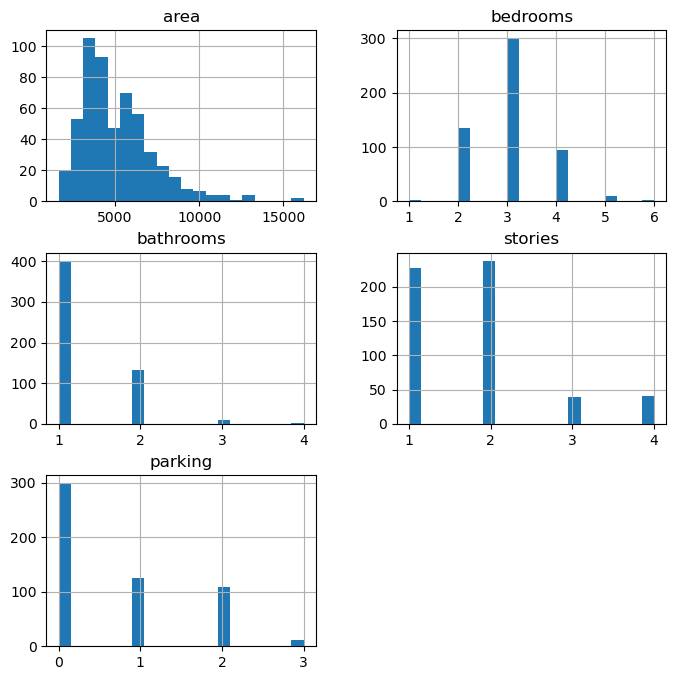

In [81]:
# visualize numerical attributes with histogram
numerical_vals = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
df[numerical_vals].hist(figsize=(8,8), bins=20)
plt.show()

Notice that some of the attributes have binary values. They are represented as 'yes' or 'no'. Change them to numerical representations with 0 and 1. You can either replace the original columns (Pandas.Series) and change their data type, or create new columns with a modified name for them. Avoid using for-loops for this task.

In [82]:
# change binary to numerical values
binary_vals = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
df[binary_vals] = df[binary_vals].replace({'yes': 1, 'no': 0})

C:\Users\Jacob\AppData\Local\Temp\ipykernel_21168\4238747470.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[binary_vals] = df[binary_vals].replace({'yes': 1, 'no': 0})


Use 437 as seed for `train_test_split()` function, split the data into a training set and a test set. 

In [83]:
# split dataset
X = df.drop(columns=['price'])
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=437)

## Part 2: Linear Regression with Single Variable

Use sklearn to build a single variable linear regression model that uses area to predict house price.

In [84]:
# linear regression model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

reg = LinearRegression()
reg.fit(X_train[['area']], y_train)

# predict house prices using the area attrubute
y_pred_area = reg.predict(X_train[['area']])
print(y_pred_area)

[3355919.61773657 3468567.91932123 4641987.7274947  5411751.1216565
 4219556.59655225 5545520.97978828 6214370.27044716 4031809.42724449
 4257106.0304138  4219556.59655225 5327264.89546801 4454240.55818695
 5327264.89546801 4294655.46427535 7148412.43775324 5439913.19705267
 3567135.1832078  3344185.41965484 4200781.87962148 3984872.63491756
 3468567.91932123 4923608.48145634 5040950.46227368 3947323.201056
 6120496.68579328 4149151.40806184 4212985.44562648 5139517.72616026
 9664224.50647717 4782798.10447552 4641987.7274947  4050584.14417527
 3609378.29630204 3947323.201056   5369508.00856226 4407303.76586001
 4050584.14417527 4219556.59655225 4332204.8981369  4031809.42724449
 6941890.55151471 6510072.06210687 4685169.57643549 3990505.04999679
 5472768.95168152 5327264.89546801 4050584.14417527 3750188.67328286
 3609378.29630204 3767085.91852056 6644311.28816192 5104315.13191505
 6143965.08195675 4379141.69046384 5383589.04626034 4688924.51982164
 5736084.35663565 4045890.46494258 58

What is the in-sample R-Squared?

In [85]:
r2_score_area = r2_score(y_train, y_pred_area)
print(f"in sample R-Squared: {r2_score_area }")

in sample R-Squared: 0.27317579448141893


Draw the scatter plot and the linear regression line

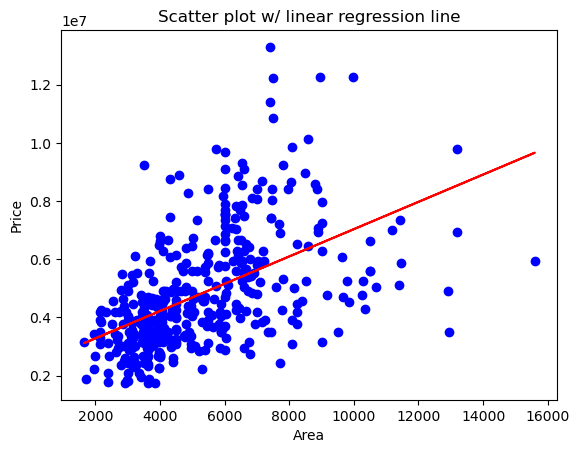

In [86]:
plt.scatter(X_train[['area']], y_train, color="blue")
plt.plot(X_train[['area']], y_pred_area, color="red")
plt.xlabel("Area")
plt.ylabel("Price")
plt.title("Scatter plot w/ linear regression line")
plt.show()

Now do the same thing again but this time use the number of bedrooms to predict the house price. You should create a separate model for this task. Do not overwrite the parameters of the first model. Also calculate the R-Squared and draw the scatter plot. 

[4813953.47750604 4813953.47750604 3860514.6678744  4813953.47750604
 4813953.47750604 4813953.47750604 4813953.47750604 3860514.6678744
 3860514.6678744  4813953.47750604 5767392.28713768 3860514.6678744
 3860514.6678744  4813953.47750604 3860514.6678744  4813953.47750604
 5767392.28713768 4813953.47750604 4813953.47750604 5767392.28713768
 4813953.47750604 4813953.47750604 4813953.47750604 3860514.6678744
 4813953.47750604 4813953.47750604 3860514.6678744  4813953.47750604
 4813953.47750604 5767392.28713768 4813953.47750604 3860514.6678744
 4813953.47750604 5767392.28713768 5767392.28713768 3860514.6678744
 3860514.6678744  4813953.47750604 4813953.47750604 4813953.47750604
 5767392.28713768 3860514.6678744  4813953.47750604 3860514.6678744
 4813953.47750604 4813953.47750604 5767392.28713768 3860514.6678744
 3860514.6678744  4813953.47750604 3860514.6678744  3860514.6678744
 5767392.28713768 4813953.47750604 4813953.47750604 4813953.47750604
 4813953.47750604 4813953.47750604 5767392

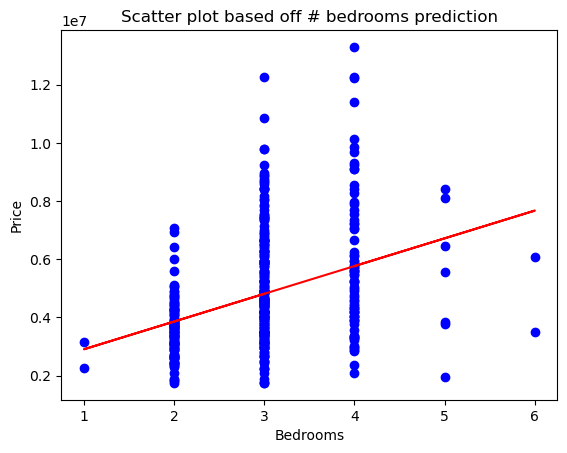

In [87]:
# create seperate model using number of bedrooms
reg_bedrooms = LinearRegression()
reg_bedrooms.fit(X_train[['bedrooms']], y_train)

# predict house prices
y_pred_bedrooms = reg_bedrooms.predict(X_train[['bedrooms']])
print(y_pred_bedrooms)

# R-Squared for bedrooms
r2_score_bedrooms = r2_score(y_train, y_pred_bedrooms)
print(f"r-squared for bedrooms model: {r2_score_bedrooms}")

# scatter plot
plt.scatter(X_train[['bedrooms']], y_train, color="blue")
plt.plot(X_train[['bedrooms']], y_pred_bedrooms, color="red")
plt.xlabel("Bedrooms")
plt.ylabel("Price")
plt.title("Scatter plot based off # bedrooms prediction")
plt.show()


Now do the same thing again but this time use the number of bathrooms to predict the house price. You should create a separate model for this task. Do not overwrite the parameters of the other models. Also calculate the R-Squared and draw the scatter plot.

[ 4194797.64608119  4194797.64608119  4194797.64608119  4194797.64608119
  4194797.64608119  4194797.64608119  6201862.97654999  4194797.64608119
  4194797.64608119  6201862.97654999  6201862.97654999  4194797.64608119
  4194797.64608119  4194797.64608119  4194797.64608119  4194797.64608119
  8208928.30701879  6201862.97654999  4194797.64608119  4194797.64608119
  4194797.64608119  6201862.97654999  6201862.97654999  4194797.64608119
  4194797.64608119  4194797.64608119  6201862.97654999  4194797.64608119
  4194797.64608119  4194797.64608119  4194797.64608119  4194797.64608119
  4194797.64608119  6201862.97654999  4194797.64608119  4194797.64608119
  4194797.64608119  4194797.64608119  4194797.64608119  4194797.64608119
  6201862.97654999  4194797.64608119  6201862.97654999  4194797.64608119
  4194797.64608119  4194797.64608119  4194797.64608119  4194797.64608119
  4194797.64608119  4194797.64608119  4194797.64608119  4194797.64608119
  4194797.64608119  4194797.64608119  4194797.64608

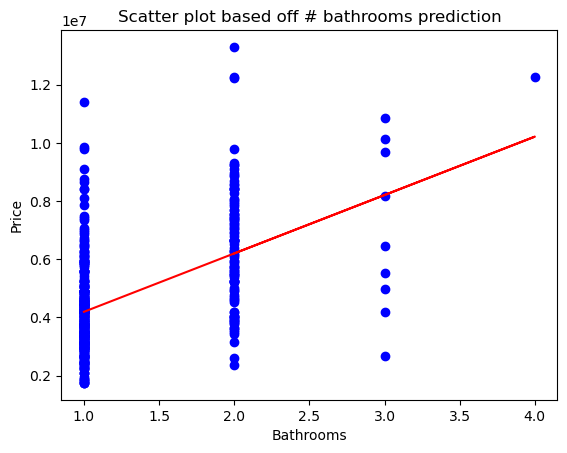

In [88]:
# model using number of bathrooms
reg_bathrooms = LinearRegression()
reg_bathrooms.fit(X_train[['bathrooms']], y_train)

y_pred_bathrooms = reg_bathrooms.predict(X_train[['bathrooms']])
print(y_pred_bathrooms)

# calculate R-squared
r2_score_bathrooms = r2_score(y_train, y_pred_bathrooms)
print(f"r-squared for bathrooms prediction: {r2_score_bathrooms}")

# scatter plot
plt.scatter(X_train[['bathrooms']], y_train, color="blue")
plt.plot(X_train[['bathrooms']], y_pred_bathrooms, color="red")
plt.xlabel("Bathrooms")
plt.ylabel("Price")
plt.title("Scatter plot based off # bathrooms prediction")
plt.show()

For each of the model, compare the root mean squared error (RMSE) on the training set and on the test set.

In [89]:
# rmse - area
rmse_area_train = np.sqrt(mean_squared_error(y_train, y_pred_area))
rmse_area_test = np.sqrt(mean_squared_error(y_test, reg.predict(X_test[['area']])))
print(f"RMSE (area) - Training set: {rmse_area_train}, Test set: {rmse_area_test}")

# Calculate RMSE for the bedrooms model
rmse_bedrooms_train = np.sqrt(mean_squared_error(y_train, y_pred_bedrooms))
rmse_bedrooms_test = np.sqrt(mean_squared_error(y_test, reg_bedrooms.predict(X_test[['bedrooms']])))
print(f"RMSE (bedrooms) - Training set: {rmse_bedrooms_train}, Test set: {rmse_bedrooms_test}")

# Calculate RMSE for the bathrooms model
rmse_bathrooms_train = np.sqrt(mean_squared_error(y_train, y_pred_bathrooms))
rmse_bathrooms_test = np.sqrt(mean_squared_error(y_test, reg_bathrooms.predict(X_test[['bathrooms']])))
print(f"RMSE (bathrooms) - Training set: {rmse_bathrooms_train}, Test set: {rmse_bathrooms_test}")

RMSE (area) - Training set: 1671268.871290138, Test set: 1128400.8127382728
RMSE (bedrooms) - Training set: 1826504.285253298, Test set: 1331731.7256754695
RMSE (bathrooms) - Training set: 1672542.274862854, Test set: 1265839.751685842


## Part 3: Multi-Variate Linear Regression
Train a linear regression model with area, number of bedrooms and number of bathrooms to predict house price. 

In [90]:
# TODO: Your code here
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

reg_multi = LinearRegression()
reg_multi.fit(X_train[['area', 'bedrooms', 'bathrooms']], y_train)

# predict house prices using multiple variables in the model
y_pred_multi = reg_multi.predict(X_train[['area', 'bedrooms', 'bathrooms']])
print(y_pred_multi)

# interpret the model
print(f"coefficient: {reg_multi.coef_}")
print(f"intercept: {reg_multi.intercept_}")

[ 3175240.62453392  3269569.5483378   3843079.22966505  4896743.48395474
  3898429.04036367  5008759.08097185  7066737.24624241  3332130.89239403
  3520788.7400018   5396329.22054869  6732980.24625002  3685864.35665859
  4416913.51613866  3961314.98956626  5941897.7843014   4920325.71490571
  6756990.99199941  4663314.87515604  3882707.55306302  4110993.72406875
  3269569.5483378   5985884.99432295  6084144.28995199  3261384.19954112
  5490229.62955415  3839473.46298624  4981743.4250303   4668781.91809536
  8457660.35755123  4779156.93434624  4252162.50462822  3347852.37969468
  3387480.70309265  5577450.92965248  5270453.41249145  3646560.63840697
  3347852.37969468  3898429.04036367  3992757.96416755  3741214.1673572
  8085028.15410564  5407367.21607941  5786222.10560474  3297543.62033261
  4947838.31768184  4825996.79110183  4166018.92962101  3096308.58288433
  2978397.42812948  3519541.19641808  5519775.85027903  4230220.85444348
  5918964.76364313  4032061.68241917  4873161.253003

Answer the question: 

How can we interpret the model? You can use a combination of code blocks and markdown (text) blocks to explain your answer.

::TODO

What is the in-sample R-Squared? 

In [91]:
# r-squared calculation
r2_score_multi = r2_score(y_train, y_pred_multi)
print(f"R-Squared for multiple variables model: {r2_score_multi}")

R-Squared for multiple variables model: 0.4883845475148322


Using the model of the three variables, calculate the root mean squared error (RMSE) on the training set and on the test set. 

Answer the questions:
- Is the in-sample error a good indicator of its out-of-sample error?
- Is the in-sample error smaller with this three-variable model than the single variable models?
- Is the out-of-sample error smaller with this three-variable model than the single variable models?  

In [92]:
# RMSE for multi model
rmse_multi_train = np.sqrt(mean_squared_error(y_train, y_pred_multi))
rmse_multi_test = np.sqrt(mean_squared_error(y_test, reg_multi.predict(X_test[['area', 'bedrooms', 'bathrooms']])))
print(f"RMSE (multi-variable) - Training set: {rmse_multi_train}, test set: {rmse_multi_test}")

# compare the multi RMSE values to the single RMSE valuse
print(f"Is the in-sample error a good indicator of its out-of-sample error? {'Yes' if abs(rmse_multi_train - rmse_multi_test) < 0.1 else 'No'}")
print(f"Is the in-sample error smaller with this three-variable model than the single variable models? {'Yes' if rmse_multi_train < min(rmse_area_train, rmse_bedrooms_train, rmse_bathrooms_train) else 'No'}")
print(f"Is the out-of-sample error smaller with this three-variable model than the single variable models? {'Yes' if rmse_multi_test < min(rmse_area_test, rmse_bedrooms_test, rmse_bathrooms_test) else 'No'}")

RMSE (multi-variable) - Training set: 1402179.0035304232, test set: 1056315.9980804087
Is the in-sample error a good indicator of its out-of-sample error? No
Is the in-sample error smaller with this three-variable model than the single variable models? Yes
Is the out-of-sample error smaller with this three-variable model than the single variable models? Yes


Train a linear regression model with all attributes, execept for the price itself and furnishing status (which is a categorical attribute with 3 possible values. We will learn how to deal with it later). 

Answer the questions:
- Is the in-sample error a good indicator of its out-of-sample error?
- Is the in-sample error smaller with this three-variable model than the single variable models?
- Is the out-of-sample error smaller with this three-variable model than the single variable models?  

In [93]:
# train model with all attributes except price and furnishing status
attributes = df.drop(columns=['price', 'furnishingstatus']).columns
reg_all = LinearRegression()
reg_all.fit(X_train[attributes], y_train)

# predict prices
y_pred_all = reg_all.predict(X_train[attributes])
print(y_pred_all)

# r-squared calculation
r2_score_all = r2_score(y_train, y_pred_all)
print(f"r-squared for all attributes model: {r2_score_all}")

# rmse
rmse_all_train = np.sqrt(mean_squared_error(y_train, y_pred_all))
rmse_all_test = np.sqrt(mean_squared_error(y_test, reg_all.predict(X_test[attributes])))
print(f"RMSE for all attributes - Training set: {rmse_all_train}, test set: {rmse_all_test}")

print(f"In-sample error a good indicator of out-of-sample error? {'Yes' if abs(rmse_all_train - rmse_all_test) < 0.1 else 'No'}")
print(f"In-sample error smaller with all attributes model? {'Yes' if rmse_all_train < min(rmse_area_train, rmse_bedrooms_train, rmse_bathrooms_train, rmse_multi_train) else 'No'}")
print(f"Out-of-sample error smaller with all attributes model? {'Yes' if rmse_all_test < min(rmse_area_test, rmse_bedrooms_test, rmse_bathrooms_test, rmse_multi_test) else 'No'}")

[ 2901880.00495813  3047732.85507924  3960069.11065701  5736231.89579736
  3758633.26906553  6085904.22142636  6914297.09096503  2734485.25399197
  2849887.30576032  6583756.38820534  7994296.49245164  5134234.53665822
  5068939.99696669  4663017.2100521   6699105.49633155  7755906.44799334
  4747823.0996693   3509328.40468668  3984326.43366382  4064425.66758749
  2046544.39771655  4726639.6538017   8273067.84946123  4874579.92017943
  5924481.57934991  3546820.26649376  4439335.83880176  4664145.50009427
  7305372.49898165  4322664.22090278  3149573.52016266  2744102.09163933
  2118670.68007177  4417256.96300717  4121213.62789693  3253048.915031
  2744102.09163933  2930429.59148781  4423713.56043302  4961092.45534781
  6953050.61470501  5263740.90511072  5347876.53770987  3821720.32237827
  5769532.11017968  5283941.7547728   3856690.64680951  3092209.45876747
  2018894.71904956  3611700.43731212  6069788.06602096  4543680.18626444
  7646647.46812775  3012172.7114904   4789271.6889003

## Submit Your Assignment
To print your assignment, first select Cell -> Run All. Then choose File -> Download as -> HTML. You should submit both the Jupyter Notebook file and theprinted HTML file.

Acknowledgement:
- https://www.kaggle.com/datasets/yasserh/housing-prices-dataset
- Harrison, D. and Rubinfeld, D.L. (1978) Hedonic prices and the demand for clean air. J. Environ. Economics and Management 5, 81–102.
- Belsley D.A., Kuh, E. and Welsch, R.E. (1980) Regression Diagnostics. Identifying Influential Data and Sources of Collinearity. New York: Wiley.